In [11]:
#!wget "https://www.dropbox.com/s/r1tjwocjon2z00a/GK2_page-0036.jpg?dl=0"

In [10]:
!wget "https://www.dropbox.com/s/nbzz14h82dyiz98/GK2_page-0383.jpg?dl=0"

--2021-05-20 18:07:55--  https://www.dropbox.com/s/nbzz14h82dyiz98/GK2_page-0383.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nbzz14h82dyiz98/GK2_page-0383.jpg [following]
--2021-05-20 18:07:56--  https://www.dropbox.com/s/raw/nbzz14h82dyiz98/GK2_page-0383.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5b3cba95b8af0412aa4cc39d15.dl.dropboxusercontent.com/cd/0/inline/BO3wrWzhK2pt3sv6WyUxX4xnrzSxti6NXQhWb3ZPpms6tV6CTyNgBEWS0kf8CIKOMcNkwmdBomgQ-JMwCYnsza3CCVE2UiZZIfe1Po791sbZgGV9PMmKWEFQGw2OifFTRaRETXF_xj4lX4eEMue4armL/file# [following]
--2021-05-20 18:07:56--  https://uc5b3cba95b8af0412aa4cc39d15.dl.dropboxusercontent.com/cd/0/inline/BO3wrWzhK2pt3sv6WyUxX4xnrzSxti6NXQhWb3ZPpms6tV6CTyNgBEWS0kf8CIKOMcNkwm

In [15]:
!wget "https://www.dropbox.com/s/nn95d7fcono976h/page-095.jpeg?dl=0"

--2021-05-20 18:08:39--  https://www.dropbox.com/s/nn95d7fcono976h/page-095.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nn95d7fcono976h/page-095.jpeg [following]
--2021-05-20 18:08:39--  https://www.dropbox.com/s/raw/nn95d7fcono976h/page-095.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9a170d8b867094f85303b96965.dl.dropboxusercontent.com/cd/0/inline/BO1UoV4pMCDYD9j5W4VY1T6Vb6OVQkowtzkEobHLckYdrWSTMvXz7UrjIGItUpjng1THkamsJoDD14GQK9wYqGbWZBjMt5XZzXwf85OoX19SidVvpwY8PoRTusNSFodMVqZh0VDItFqjqjYpQJFKAwPq/file# [following]
--2021-05-20 18:08:40--  https://uc9a170d8b867094f85303b96965.dl.dropboxusercontent.com/cd/0/inline/BO1UoV4pMCDYD9j5W4VY1T6Vb6OVQkowtzkEobHLckYdrWSTMvXz7UrjIGItUpjng1THkamsJoDD14GQK

In [3]:
import cv2
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow
import numpy as np

In [16]:
# read input image
img = cv2.imread('page-095.jpeg?dl=0')

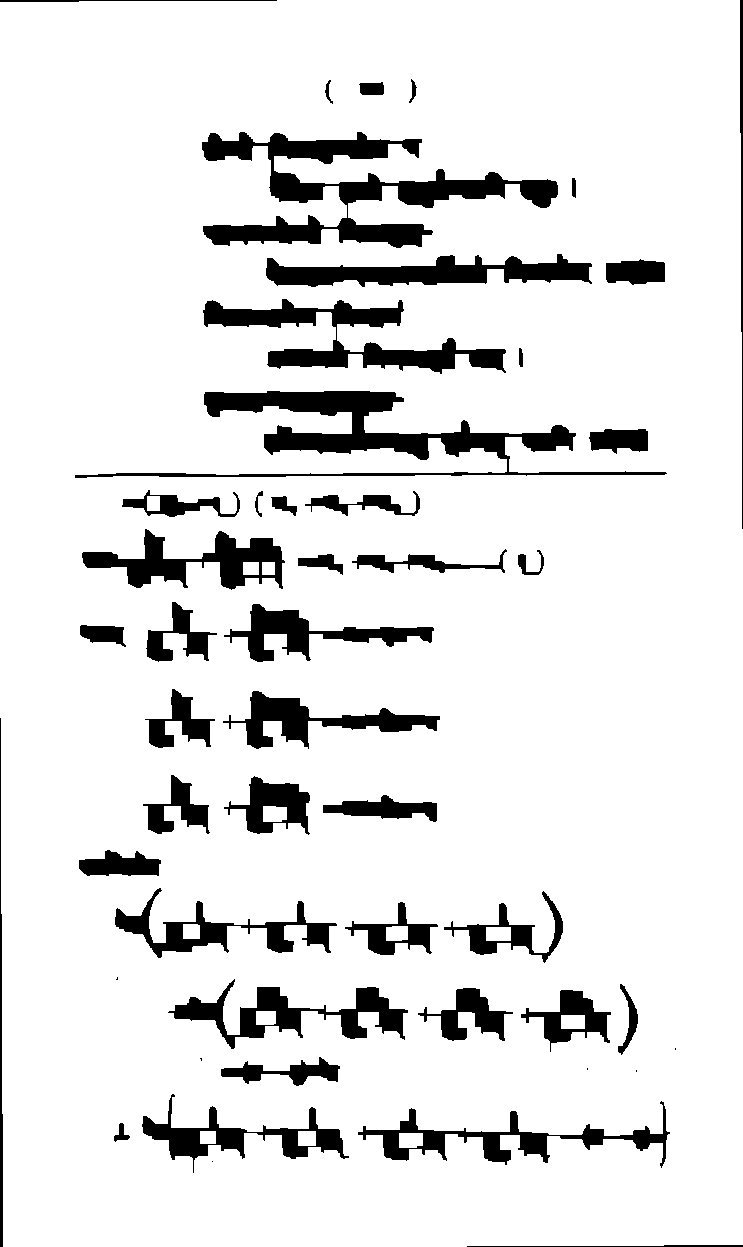

In [17]:
# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# otsu threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

# apply morphology open
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13,13)) # Adjust the kernal size to increase or decrease the number of bounding boxes 
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2_imshow(morph)
morph = 255 - morph

In [18]:
# find contours and bounding boxes
bboxes = []
number = 1
box_coordinates = {}
bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    if w>27 and h>30:  # this checks what size of bounding boxes we wanted
      x-=2 
      w+=3
      h+=3
      cv2.rectangle(bboxes_img, (x, y), (x+w, y+h), (0, 0, 255), 1)
      cv2.putText(bboxes_img,str(number), (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
      bboxes.append((x,y,w,h))
      box_coordinates[number] = [x,y,w,h]
      number+=1

print(number)

20


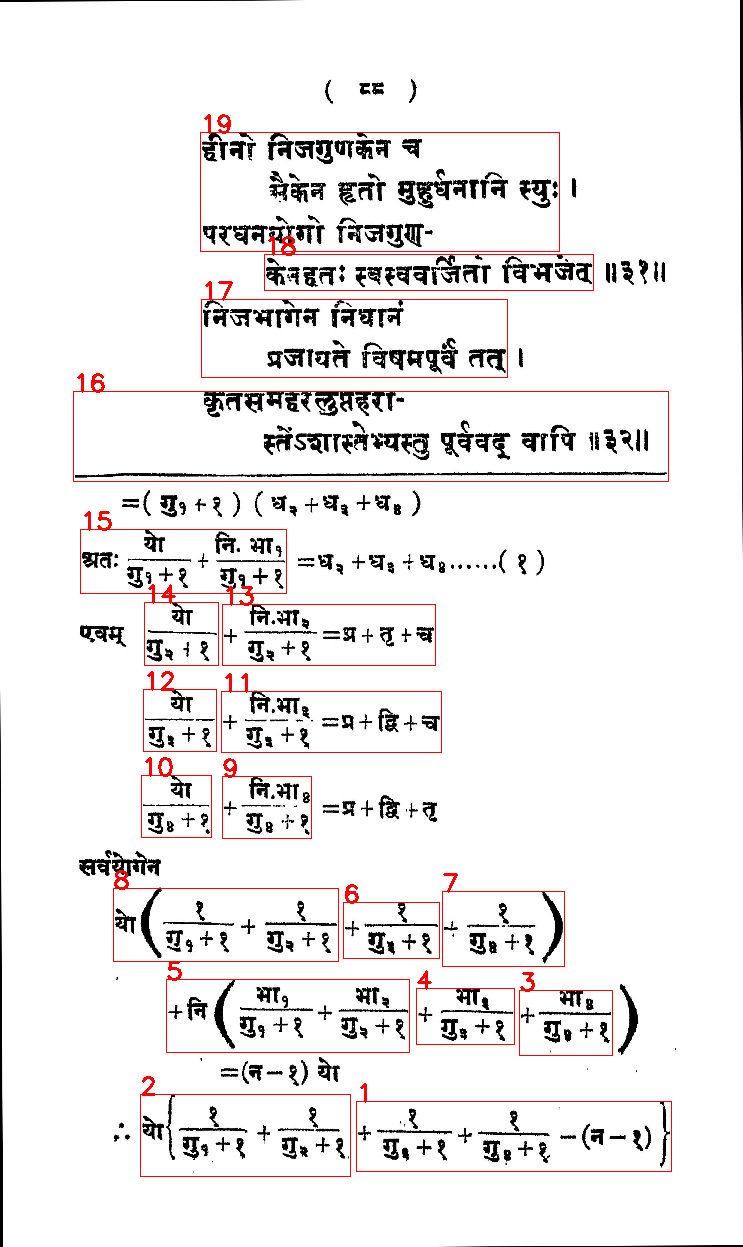

-1

In [19]:
cv2_imshow(bboxes_img)
cv2.waitKey(0)

In [20]:
def extract_from_image(image,key):

  x,y,w,h = box_coordinates[key]

  start_x = x
  start_y = y
  end_x = x+w
  end_y = y+h

  #table_image = imutils.resize(table_image,width = 2964) #previously it was 2564

  ROI = image[start_y:end_y, start_x:end_x]    
  # draw the bounding box on the image
  #cv2.rectangle(table_image, (start_x, start_y), (end_x, end_y), (0,0,255), 2)
  cv2.imwrite('Equation_'+str(key)+"_image"+'.png', ROI)

In [21]:
extract_from_image(bboxes_img,11)

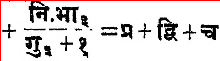

In [23]:
im = cv2.imread("Equation_11_image.png")
cv2_imshow(im)